# Q3: Fourier Analysis

## Part 1: analysing a sound file

Import the relevant libraries

In [1]:
%matplotlib notebook
import monashspa
import matplotlib.pyplot as plt
import numpy as np
import wave
from matplotlib.widgets import Cursor

First we have to import our recorded sample and extract the waveform 

In [2]:
## Choose a file to plot
filename = "PHS2061_Q3_Guitar_Pluck.wav"

## Open the file
signal_wave = wave.open(filename, 'r')

## Extract the sample rate from the file
sample_rate = signal_wave.getframerate()

## Create a numpy array from the waveform
sig = np.frombuffer(signal_wave.readframes(-1), dtype=np.int16)

## The audio is recorded in stereo so we want to
## split the left and right channels apart.
## We will only use the left channel from here onwards
left, right = sig[0::2], sig[1::2]

Now we can plot our sample. Try looking at different ranges by changing the start and end points.

<IPython.core.display.Javascript object>


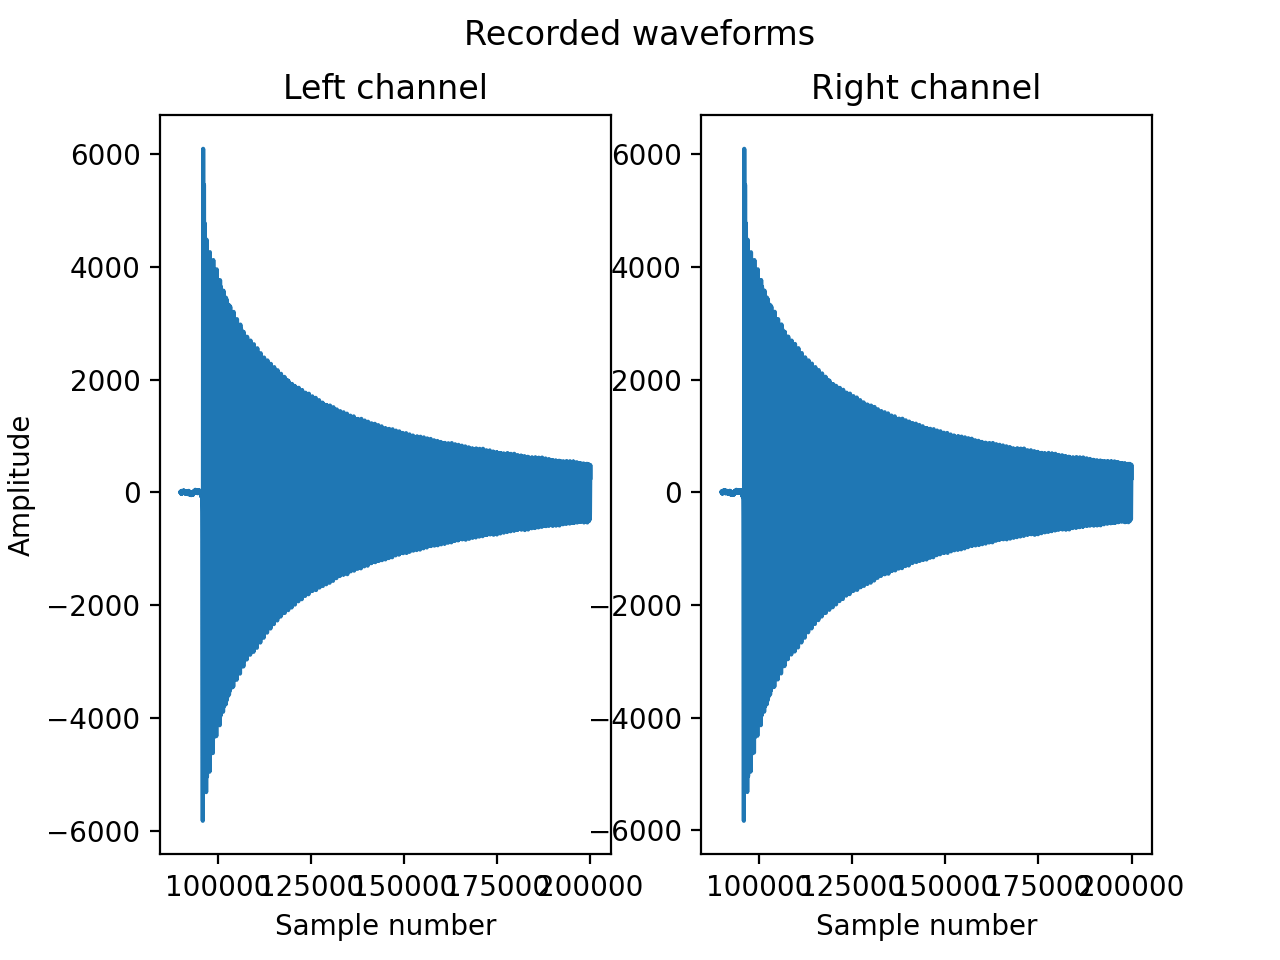

In [3]:
## If you want to trim the sample 
## choose suitable beginning and end points

# sample_start  = 0
# sample_end    = len(left)
sample_start  = 90000
sample_end    = 200000

## Create the values for the x axis
sample_numbers = np.arange(len(left))

## The variables we want to plot on our graph
x = sample_numbers[sample_start:sample_end]
y = left[sample_start:sample_end]

## Create a plot for the left channel 
fig, (ax0, ax1) = plt.subplots(1, 2)
ax0.plot(x,y)
ax0.set_xlabel('Sample number')
ax0.set_ylabel('Amplitude')
ax0.set_title('Left channel')

## Create a plot for the right channel
x = sample_numbers[sample_start:sample_end]
y = right[sample_start:sample_end]
ax1.plot(x,y)
ax1.set_xlabel('Sample number')
ax1.set_title('Right channel')

fig.suptitle('Recorded waveforms')

plt.savefig('part1_waveform.png')

In order to work out what freqencies are present we must do a fourier transform. Luckily NumPy has a function to do this for us.

In [4]:
## Perform a fast fourier transform of the waveform
data_to_transform = left[sample_start:sample_end]
fourier_transform = np.fft.rfft(data_to_transform)

## Take the absolute value
abs_fourier_transform =  np.abs(fourier_transform)

## Create an array with the frequencies for each point in the transform 
freq = np.fft.rfftfreq(data_to_transform.size, d=1./sample_rate)

Now we can try plotting the fourier transform. What do you notice about the positions of the peaks? 

<IPython.core.display.Javascript object>


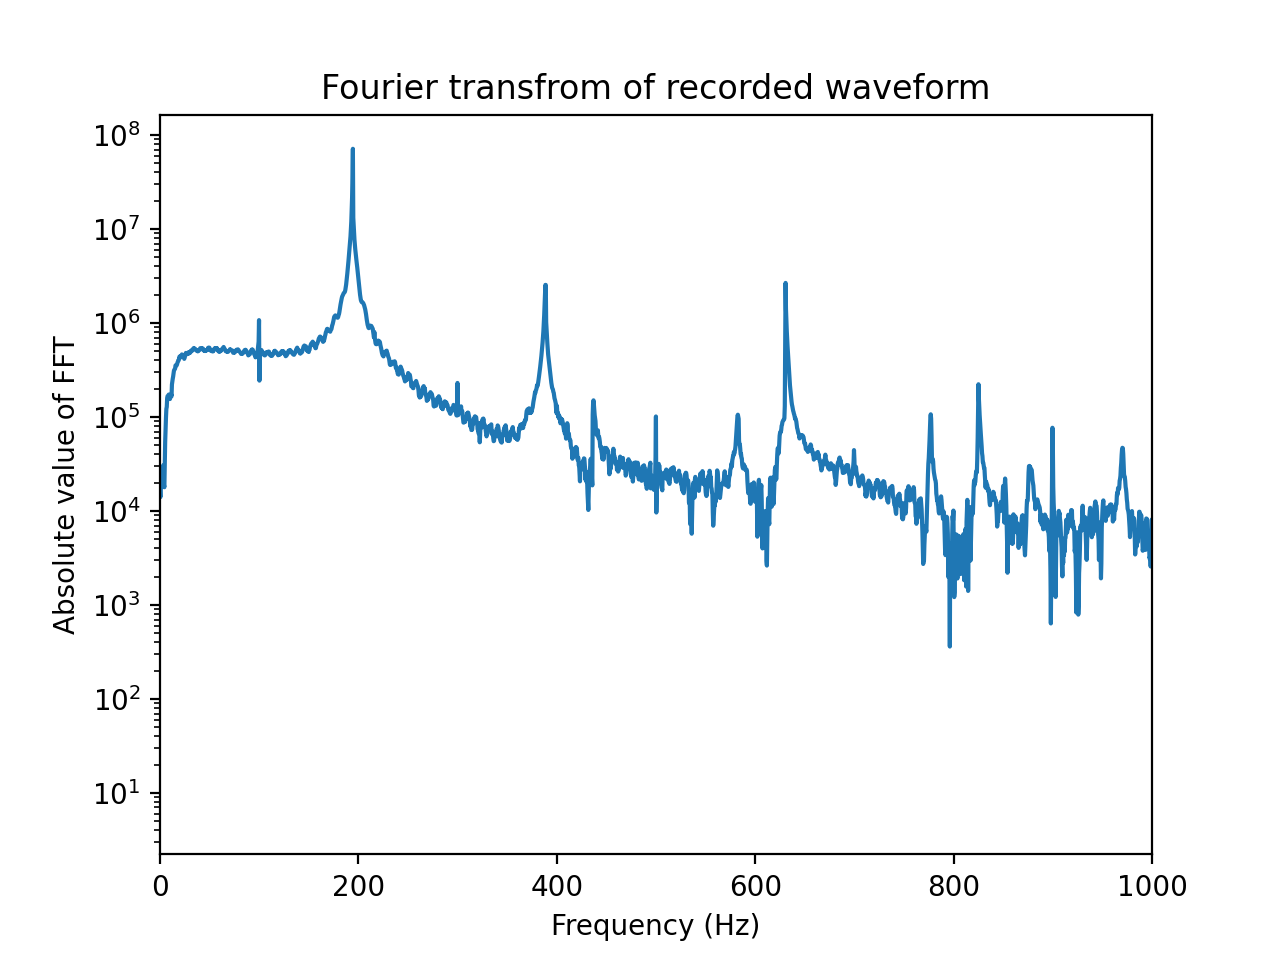

In [5]:
fig, (ax0) = plt.subplots(1, 1)
ax0.plot(freq,abs_fourier_transform)
ax0.set_xlabel('Frequency (Hz)')
ax0.set_ylabel('Absolute value of FFT')
ax0.set_yscale('log')
ax0.set_title('Fourier transfrom of recorded waveform')

## Pick which range of frequencies to plot
ax0.set_xlim([0, 1000])

cursor = Cursor(ax0, color='green', linewidth=1)
plt.savefig('part1_spectrum.png')